In [1]:
# imports

import sys
import os

import pandas as pd

sys.path.append('D:/grb/grbLC/')
import grblc

090926A
-------
       occur
white    114
U         79
V         48
I         48
R         47
B         17
J          3
i          1
g          1
r          1 
The most numerous filter of this GRB:  white , with 114 occurrences.
The most numerous will be considered for rescaling.
['white', 'U', 'V', 'I', 'R', 'B', 'J', 'i', 'g', 'r'] 10
['white', 'J', 'g', 'V', 'U', 'i', 'I', 'r', 'R', 'B'] 10
Individual point rescaling:
    band  occur_band  time_sec  rescale_fact  rescale_fact_err
0      U         114  4.670165     -0.081405          0.069874
1      V         114  4.676975      0.034461          0.109897
2      V         114  4.678724      1.256042          0.294088
3      U         114  4.713910      0.058783          0.057177
4      V         114  4.725378     -0.201297          0.105134
..   ...         ...       ...           ...               ...
240    U         114  5.988457      0.752647          0.539883
241    U         114  6.006924     -0.478458          0.718348
242    i

C:\Users\ridha\AppData\Local\Temp\ipykernel_20268\1153229282.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_light.show()
C:\Users\ridha\AppData\Local\Temp\ipykernel_20268\1153229282.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_rescale_slopes.show()
C:\Users\ridha\AppData\Local\Temp\ipykernel_20268\1153229282.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_light_rescaled.show()


,time_sec,mag,mag_err,band,rescaled_to,band_og,system,telescope,source
0,4.670165,18.441049,0.061818,U,white,U,AB,NGSO/Swift/UVOT,Roming2017
1,4.673581,18.359645,0.032572,white,white,white,AB,NGSO/Swift/UVOT,Roming2017
2,4.676975,18.325184,0.104959,V,white,V,AB,NGSO/Swift/UVOT,Roming2017
3,4.678724,17.103603,0.292279,V,white,V,AB,NGSO/Swift/UVOT,Roming2017
4,4.713910,18.623397,0.049658,U,white,U,AB,NGSO/Swift/UVOT,Roming2017
...,...,...,...,...,...,...,...,...,...
354,6.225807,22.698630,0.416194,white,white,white,AB,NGSO/Swift/UVOT,Roming2017
355,6.252482,23.675753,0.395638,white,white,white,AB,NGSO/Swift/UVOT,Roming2017
356,6.296349,23.625778,0.120000,i,white,i',AB,CP/Gemini-South(8.1m)/GMOS,arXiv1004.2900
357,6.296349,24.471788,0.110000,g,white,g',AB,CP/Gemini-South(8.1m)/GMOS,arXiv1004.2900


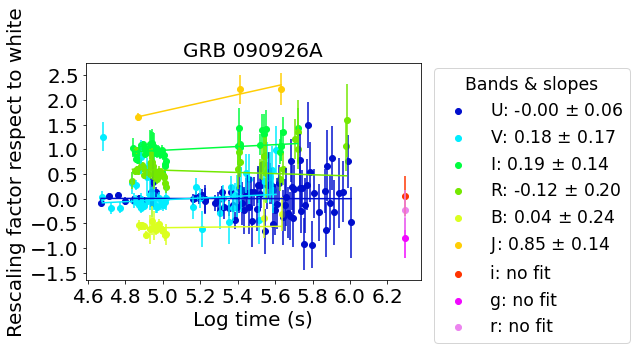

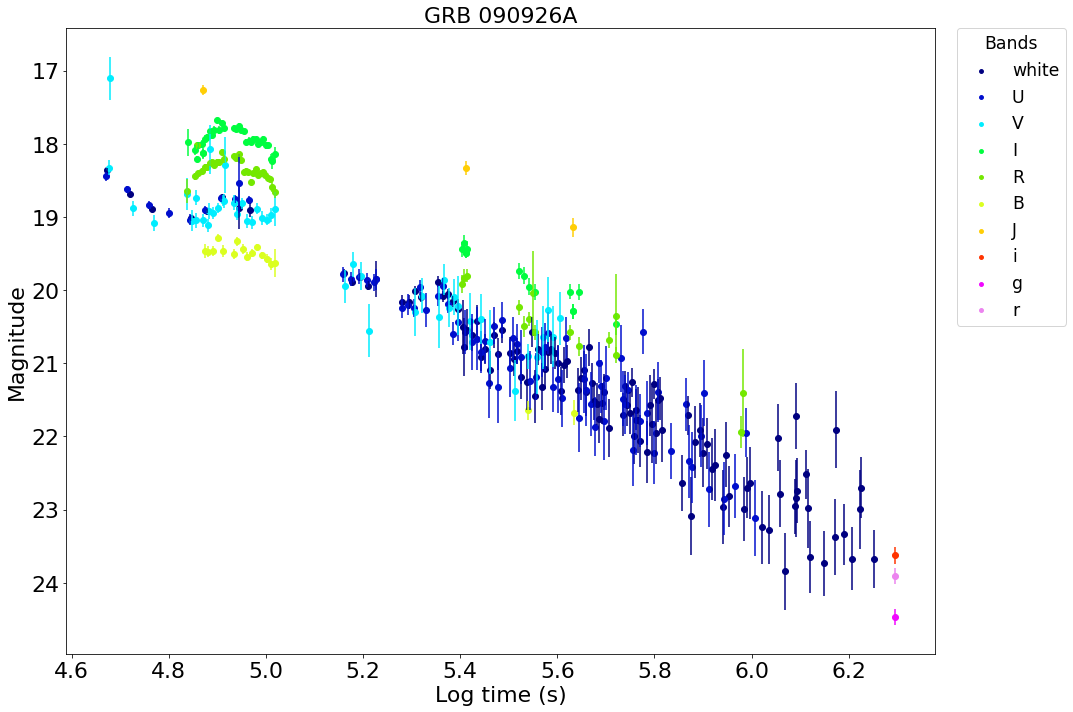

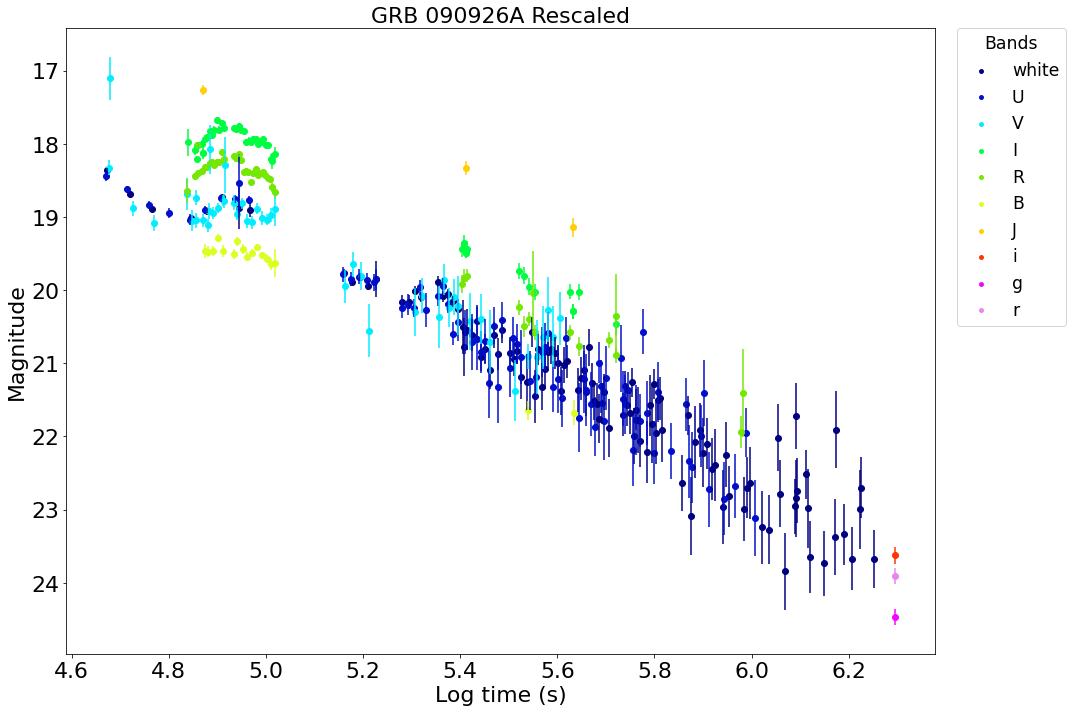

In [1]:
import sys
sys.path.append('D:/grb/grbLC/')
from grblc.evolution.lightcurve import Lightcurve

grb = '090926A'

lc = Lightcurve(path = 'D:/grb/sample/mag-AB-extcorr-30-05-2023/'+grb+'_magAB_extcorr.txt',
                name = grb,
                appx_bands=True)

fig_light, fig_rescale_slopes, fig_light_rescaled, rescale_df, rescale_slopes_df, light_rescaled = lc.rescaleGRB(rescale_band='numerous', 
                                                                       print_status=True, 
                                                                       save_plot=True, 
                                                                       save_df=True, 
                                                                       save_in_folder='rescale/')

fig_light.show()
fig_rescale_slopes.show()
fig_light_rescaled.show()

light_rescaled

### collapse

In [2]:
# run this the first time you use grblc to download SFD maps

import grblc.convert.sfd
grblc.convert.sfd.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [ ]:
# reading data with grblc

import sys
sys.path.append('D:/grb/grbLC/')
import grblc.evolution.io as io

data = io.read_data(path='converted/970228A_magAB_extcorr.txt')

In [ ]:
# convert to AB system and correct for extinction

import grblc.convert as cv

info = pd.read_csv('data/grblist.csv', sep=',', index_col='grb')

grb = '970228A'

cv.correctGRB(grb = grb,
            ra = info.loc[grb, 'ra'],
            dec = info.loc[grb, 'dec'],
            path = 'converted/970228A_magAB_extcorr.txt',
            save_in_folder = 'converted/',
            debug = False
            )

In [ ]:
lc.displayGRB()